In [289]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as pPlot
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import pickle

In [290]:
#Load Dataset
df=pd.read_csv(
    "final_train_edited.csv",
    sep=",",encoding='ISO-8859-1')

In [291]:
#Displaying data set
df

,Id,Description,Emotion
0,1,The buses do not arrive on time,anger
1,2,The buses are always crowded,anger
2,3,The buses arrive earlier than the schelued tim...,anger
3,4,The buses take the passengers to the desired\n...,happy
4,5,The buses have too many empty seats that it co...,anger
...,...,...,...
42345,42346,"Let me see . Ah , yes , I've been to England ...",happy
42346,42347,"Me , I 'm miserable that it 's all beginning .",sad
42347,42348,i keep telling myself ill feel like celebratin...,happy
42348,42349,Whatever . Just turn right here . . . The fre...,anger


df.to_csv('File_name.csv')

In [292]:
#Shape
df.shape

(42350, 3)

In [293]:
#DataTypes
df.dtypes

Id              int64
Description    object
Emotion        object
dtype: object

In [294]:
#Get the columns information to check whether there are null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           42350 non-null  int64 
 1   Description  42350 non-null  object
 2   Emotion      42350 non-null  object
dtypes: int64(1), object(2)
memory usage: 992.7+ KB


In [295]:
#Data Preprocessing
#Check the null values
df.isnull().sum()

Id             0
Description    0
Emotion        0
dtype: int64

In [296]:
#Drop the null value
df_drop = df.dropna()
df_drop.shape

(42350, 3)

In [297]:
#Value count of Emotions
df['Emotion'].value_counts()

happy    14083
sad      10592
anger     9788
fear      7887
Name: Emotion, dtype: int64

## Preprocessing of Data
+ Remove noise
+ Special characters
+ Punctuations
+ Tokanize
+ Remove stop words

In [298]:
#seperate review text from panda frmae in order to cleaning process
Text = df.iloc[:,1].values

In [299]:
#data cleaning process
#creating a list  to store cleaned data
WordsArray = []

for word in range(0, len(Text)):
    # Remove all the special characters
    TextWordsArray = re.sub(r'\W', ' ', str(Text[word]))

    # remove all single characters
    TextWordsArray= re.sub(r'\s+[a-zA-Z]\s+', ' ', TextWordsArray)

    # Remove single characters from the start
    TextWordsArray = re.sub(r'\^[a-zA-Z]\s+', ' ', TextWordsArray) 
    

    # Substituting multiple spaces with single space
    TextWordsArray = re.sub(r'\s+', ' ', TextWordsArray, flags=re.I)
    
    #Remove urls
    TextWordsArray = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', TextWordsArray, flags=re.I)
    
    # Converting to Lowercase
    TextWordsArray = TextWordsArray.lower()
    
    
    WordsArray.append(TextWordsArray)

In [300]:
WordsArray

['the buses do not arrive on time ',
 'the buses are always crowded ',
 'the buses arrive earlier than the schelued time and therefore passengers are confused about the bus arrival time ',
 'the buses take the passengers to the desired destination at the scheduled time ',
 'the buses have too many empty seats that it could utilize ',
 'the buses could use better air conditioning ',
 'the buses can accommodate more users by fixing additional seats as the buses are very crowded during rush hour traffic ',
 'the buses arrive on time ',
 'the bus drivers drive recklessly ',
 'the buses are not maintained in proper conditions',
 'the passenger lives are in danger during rush hour traffic as passengers have to travel even in the foot board ',
 'the bus has plenty of empty comfortable seats for the passengers to travel',
 'the buses take the scheduled route and avoid traffic when needed ',
 'it would be more convenient if the drivers leave the bus station at the schduled time',
 'the bus driv

In [301]:
# Tokenization of Data
# Define a function called emotion_tokenization

def emotion_tokenization(WordsArray):
    
    # Splits the string in text on any consecutive runs of whitespace
    tokens=WordsArray.split()
    return tokens

# Apply function on emotion_content
df['Description']=df['Description'].apply(emotion_tokenization)

In [302]:
# To return top 5 rows in cleaning dataset
df.head()

,Id,Description,Emotion
0,1,"[The, buses, do, not, arrive, on, time]",anger
1,2,"[The, buses, are, always, crowded]",anger
2,3,"[The, buses, arrive, earlier, than, the, schel...",anger
3,4,"[The, buses, take, the, passengers, to, the, d...",happy
4,5,"[The, buses, have, too, many, empty, seats, th...",anger


### Apply the Normalization, stemming, Lemmatization for the tokens in order to reduce the term vocabulary

### Conversion of Data to Lowercase

In [303]:
# Conversion of Data to Lowercase
# Define a function called lower_casing

def lower_casing(token_list):
    new_lower_list=[]
    for  x in  token_list:
        
        # Returns a copy of the string in which all case-based characters have been lowercased
        x=x.lower()
        new_lower_list.append(x) 
        
    return new_lower_list

#Apply function on emotion_content column
df['Description']=df['Description'].apply(lower_casing)

In [304]:
# To return top 5 rows in emotion_content column
df['Description'].head()

0              [the, buses, do, not, arrive, on, time]
1                   [the, buses, are, always, crowded]
2    [the, buses, arrive, earlier, than, the, schel...
3    [the, buses, take, the, passengers, to, the, d...
4    [the, buses, have, too, many, empty, seats, th...
Name: Description, dtype: object

### Removal of Punctuation Symbols

In [305]:
import string as s

In [306]:
# Removal of Punctuation Symbols
# Define a function called remove_all_punctuations

def remove_all_punctuations(new_lower_list):
    new_list=[]
    for x in new_lower_list:
        for  i in  s.punctuation:
            x=x.replace(i,'')
        new_list.append(x)
        
    return new_list

#Apply function on emotion_content column
df['Description']=df['Description'].apply(remove_all_punctuations)

In [307]:
# To return top 5 rows in summary column
df['Description'].head()

0              [the, buses, do, not, arrive, on, time]
1                   [the, buses, are, always, crowded]
2    [the, buses, arrive, earlier, than, the, schel...
3    [the, buses, take, the, passengers, to, the, d...
4    [the, buses, have, too, many, empty, seats, th...
Name: Description, dtype: object

### Removal of Numbers(digits)

In [308]:
# Removal of Numbers(digits)
# Define a function called remove_numbers

def remove_all_numbers(word_list):
    no_digits_list=[]
    new_list=[]

    for x in  word_list:
        for y in  s.digits:
            x=x.replace(y,'')
        no_digits_list.append(x)
        
    for x in  no_digits_list:
        if  x!='':
            new_list.append(x)
            
    return new_list

#Apply function on emotion_content column
df['Description']=df['Description'].apply(remove_all_numbers)

In [309]:
# To return top 5 rows in emotion_content column
df['Description'].head()

0              [the, buses, do, not, arrive, on, time]
1                   [the, buses, are, always, crowded]
2    [the, buses, arrive, earlier, than, the, schel...
3    [the, buses, take, the, passengers, to, the, d...
4    [the, buses, have, too, many, empty, seats, th...
Name: Description, dtype: object

In [310]:
#should be removed those Stopwords
#Store all the stop words in english in words_to_stop variable

words_to_stop = stopwords.words('english')
print(words_to_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Remove Stop words

In [311]:
# Define a function called remove_all_stopwords

def remove_all_stopwords(wordlist):
    stop_list=stopwords.words('english')
    new_list=[]
    
    for x in wordlist:
        if x not in stop_list:
            new_list.append(x)
            
    return new_list

#Call the remove_all_stopwords function
#Apply function on emotion_content column
df['Description']=df['Description'].apply(remove_all_stopwords)

In [312]:
# To return top 5 rows in emotion_content column
df['Description'].head()

0                                [buses, arrive, time]
1                             [buses, always, crowded]
2    [buses, arrive, earlier, schelued, time, there...
3    [buses, take, passengers, desired, destination...
4          [buses, many, empty, seats, could, utilize]
Name: Description, dtype: object

### Lemmatization of Data

In [313]:
# Lemmatization of Data

word_lemmatizer=nltk.stem.WordNetLemmatizer()

# Define a function called words_lemmatzation

def words_lemmatzation(word_list):
    new_list=[]
    
    for x in word_list:
        x=word_lemmatizer.lemmatize(x)
        new_list.append(x)
        
    return new_list

#Apply function on emotion_content column
df['Description']=df['Description'].apply(words_lemmatzation)

In [315]:
# To return top 5 rows in emotion_content column
df['Description'].head()

0                                  [bus, arrive, time]
1                               [bus, always, crowded]
2    [bus, arrive, earlier, schelued, time, therefo...
3    [bus, take, passenger, desired, destination, s...
4             [bus, many, empty, seat, could, utilize]
Name: Description, dtype: object

In [384]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

### Stemming

In [316]:
#import PorterStemmer
from nltk.stem import PorterStemmer

# Define a function called PorterStemmer_funtion

def PorterStemmer_funtion(wordslist):
    stemmedwords_list=[]
    pstemmer =PorterStemmer()
    stemmedWord = ''
    
    for x in wordslist:
        stemmedWord=pstemmer.stem(x)
        stemmedwords_list.append(stemmedWord)
        
    return stemmedwords_list

#Apply function on emotion_content column
df['Description']=df['Description'].apply(PorterStemmer_funtion)

In [317]:
# To return top 5 rows in emotion_content column
df.head()


,Id,Description,Emotion
0,1,"[bu, arriv, time]",anger
1,2,"[bu, alway, crowd]",anger
2,3,"[bu, arriv, earlier, schelu, time, therefor, p...",anger
3,4,"[bu, take, passeng, desir, destin, schedul, time]",happy
4,5,"[bu, mani, empti, seat, could, util]",anger


In [318]:
#created a dictionry called Description_Word_dict and add emotion_content and emotionID to it
description_Word_dict ={}

for i in df.Id[:50]:
    description_Word_dict[df.Id[i]] = df.Description[i]

In [319]:
#this emotion_Word_dict is used in question 8 
description_Word_dict

{2: ['bu', 'alway', 'crowd'],
 3: ['bu',
  'arriv',
  'earlier',
  'schelu',
  'time',
  'therefor',
  'passeng',
  'confus',
  'bu',
  'arriv',
  'time'],
 4: ['bu', 'take', 'passeng', 'desir', 'destin', 'schedul', 'time'],
 5: ['bu', 'mani', 'empti', 'seat', 'could', 'util'],
 6: ['bu', 'could', 'use', 'better', 'air', 'condit'],
 7: ['bu',
  'accommod',
  'user',
  'fix',
  'addit',
  'seat',
  'bu',
  'crowd',
  'rush',
  'hour',
  'traffic'],
 8: ['bu', 'arriv', 'time'],
 9: ['bu', 'driver', 'drive', 'recklessli'],
 10: ['bu', 'maintain', 'proper', 'condit'],
 11: ['passeng',
  'life',
  'danger',
  'rush',
  'hour',
  'traffic',
  'passeng',
  'travel',
  'even',
  'foot',
  'board'],
 12: ['bu', 'plenti', 'empti', 'comfort', 'seat', 'passeng', 'travel'],
 13: ['bu', 'take', 'schedul', 'rout', 'avoid', 'traffic', 'need'],
 14: ['would',
  'conveni',
  'driver',
  'leav',
  'bu',
  'station',
  'schdule',
  'time'],
 15: ['bu', 'drive', 'well', 'train', 'drive', 'bu', 'adequ', 'sp

In [320]:
#joining each word in description_Word_dict and append to a emotion_Words_list

description_Word_list = []
separator = ' '

for eachword in description_Word_dict.values():
    description_Word_list.append(separator.join(eachword))

In [321]:
#print the list

print(description_Word_list)


['bu alway crowd', 'bu arriv earlier schelu time therefor passeng confus bu arriv time', 'bu take passeng desir destin schedul time', 'bu mani empti seat could util', 'bu could use better air condit', 'bu accommod user fix addit seat bu crowd rush hour traffic', 'bu arriv time', 'bu driver drive recklessli', 'bu maintain proper condit', 'passeng life danger rush hour traffic passeng travel even foot board', 'bu plenti empti comfort seat passeng travel', 'bu take schedul rout avoid traffic need', 'would conveni driver leav bu station schdule time', 'bu drive well train drive bu adequ speed', 'even public holiday bu arriv time', 'uncomfort travel bu rush hour space', 'bu crowd therefor safe travel prevent diseas spread', 'bu crowd make u prone communic diseas', 'devil gloat privat grief', 'sure everyon u felt feel least sobu u might get agit easili', 'feel useless stupid', 'sound good bu fantast', 'talk close friend', 'im feel good though', 'feel greedi obsess continu sustain growth hind

### Vectorize the tokens

In [322]:

#import libraries
import math as m
from sklearn.feature_extraction.text import TfidfVectorizer

#create a function called compute_TDIDF and pass the content list(emotion_word_list) 
def compute_TDIDF(description_Word_list):
           
    #compute the normalization vector for each term
    #create the transform
    Vectorize = TfidfVectorizer(analyzer='word',norm='l2')
    
    #tokenize and build vocabulary
    vect = Vectorize.fit_transform(description_Word_list)
    
    #Returns a list of feature names, ordered by their indices
    feature_names = Vectorize.get_feature_names()

    #create a matrix
    denses = vect.todense()
    
    #convert matrix to list called dense_List
    dense_List = denses.tolist()
    
    #Create dataframe assign it to variable called TFIDF_dataframe
    #calculates the TF and IDF 
    TFIDF_dataframe = pd.DataFrame(dense_List, columns = feature_names)
    
    return TFIDF_dataframe

## Separate the datasets as Train and Test dataset

In [329]:
# Separate dataset into train_x and test_x 
X_train=df.Description[:38000]
X_test=df.Description[38000:]

# Separate dataset into train_y and test_y 
y_train=df.Emotion[:38000]
y_test=df.Emotion[38000:]

<AxesSubplot:ylabel='Emotion'>

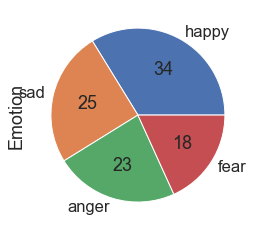

In [330]:
# Draw Pie chart using train_y
y_train.value_counts().plot(kind='pie',autopct='%1.0f')

<AxesSubplot:ylabel='Emotion'>

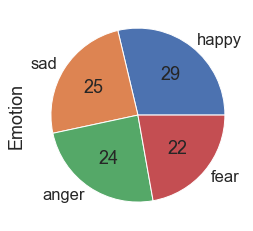

In [331]:
# Draw Pie chart using test_y
y_test.value_counts().plot(kind='pie',autopct='%1.0f')

In [332]:
X_train=X_train.apply(lambda x: ''.join(i+' ' for i in x))
X_test=X_test.apply(lambda x: ''.join(i+' '  for i in x))

In [333]:
# Import Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [334]:
#create the transform
new_vectorizer = CountVectorizer()

# tokenize and build vocabulary
new_vectorizer.fit(X_train)

# encode document train data
X_trained = new_vectorizer.transform(X_train)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (X_trained.shape)

# encode document test data
X_tested = new_vectorizer.transform(X_test)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (X_tested.shape)

(38000, 16569)
(4350, 16569)


In [335]:
#Transform a count matrix to a normalized tf-idf representation
get_tfidf = TfidfTransformer()

#tokenize and build vocabulary
get_tfidf.fit(X_trained)

#encode document test data
trained_tf_X = get_tfidf.transform(X_trained)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (trained_tf_X.shape)

#encode document train data
testes_tf_X = get_tfidf.transform(X_tested)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (testes_tf_X.shape)

(38000, 16569)
(4350, 16569)


In [336]:
#Convert series to list
train_content_array=X_train.tolist()
test_content_arrayr=X_test.tolist()
train_emotion_lbl = y_train.tolist()
test_emotion_lbl = y_test.tolist()

## Machine Learning
+ Naive Bayes
+ LogisticRegression
+ KNN
+ DecisionTree
+ SVM
 

In [337]:
#Load ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrixs
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,f1_score

## Build Model

### Multinomial Naive Bayes

In [338]:
#Naive Bayes classifier for multinomial models
Multinomial_Naive_Bayes= MultinomialNB()

#fitting
Multinomial_Naive_Bayes.fit(trained_tf_X, train_emotion_lbl)

#Perform classification on an array of ypred
#ypred
ypred_Multinomial_Naive_Bayes = Multinomial_Naive_Bayes.predict(testes_tf_X)

In [339]:
# Test Naive Bayes model using Test Data

print("First 20 actual Emotion Genres")
y_test[:20]

First 20 actual Emotion Genres


38000    happy
38001    happy
38002    anger
38003      sad
38004    anger
38005     fear
38006    happy
38007      sad
38008    anger
38009    happy
38010      sad
38011    happy
38012    happy
38013      sad
38014    happy
38015    happy
38016    happy
38017    anger
38018    anger
38019     fear
Name: Emotion, dtype: object

In [340]:
print("first 20 predicted Emotion Genres by Multinomial Naive Bayes Model")
print('--------------------------------------')

#Generate first 20 predicted emotion categories
for Emotion_Genres in ypred_Multinomial_Naive_Bayes[:20]:
    print(Emotion_Genres)

first 20 predicted Emotion Genres by Multinomial Naive Bayes Model
--------------------------------------
happy
happy
anger
sad
happy
anger
happy
sad
happy
happy
sad
happy
happy
sad
happy
happy
happy
sad
happy
anger


In [341]:
# Calculate the confusion matrix and identify the model performance
print(classification_report(y_test,ypred_Multinomial_Naive_Bayes))
print(accuracy_score(y_test, ypred_Multinomial_Naive_Bayes))

              precision    recall  f1-score   support

       anger       0.79      0.75      0.77      1063
        fear       0.93      0.66      0.78       966
       happy       0.69      0.94      0.79      1249
         sad       0.84      0.75      0.79      1072

    accuracy                           0.78      4350
   macro avg       0.81      0.77      0.78      4350
weighted avg       0.80      0.78      0.78      4350

0.7839080459770115


In [342]:
# Function for evaluate of Multinomial Naive Baye model

print("F1 score of the Multinomial Naive Bayes model")
print(f1_score(y_test,ypred_Multinomial_Naive_Bayes,average='micro'))
print("\n")

#Set the accuracy
print ('Multinomial Naive Bayes accuracy score')
print (accuracy_score(y_test,ypred_Multinomial_Naive_Bayes))
print("\n")

#Calculate accuracy as percentage
print("Accuracy of the Multinomial Naive Bayes model in percentage")
print(round(accuracy_score(y_test,ypred_Multinomial_Naive_Bayes)*100,3),"%")


F1 score of the Multinomial Naive Bayes model
0.7839080459770115


Multinomial Naive Bayes accuracy score
0.7839080459770115


Accuracy of the Multinomial Naive Bayes model in percentage
78.391 %


### Confusion Matrix - Multinomial Naive Baye

In [151]:
#Define a method called confusion_mat1
def Confusion_Matrix_Multinomial_Naive_Baye(color_code):
    
    
    MN_NB_confusion_matrix=confusion_matrix(y_test, ypred_Multinomial_Naive_Bayes)
    
    #Create data frame
    MN_NB_confusion_matrix=pd.DataFrame(MN_NB_confusion_matrix, 
                                        index=[i for i in range(1,5)], 
                                        columns=[i for i in range(1,5)])
    #set the font size of the graph
    sns.set(font_scale=1.5)
    #set the figure size
    plt.figure(figsize=(8,8));

    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(MN_NB_confusion_matrix, cmap=color_code,linewidths=1, 
                annot=True,square=True, fmt='d', 
                cbar=False,
                xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness']);
    #set the x axis label
    plt.xlabel("Predicted Emotion Genres");
    #set the y axis label
    plt.ylabel("Actual Emotion Genres");

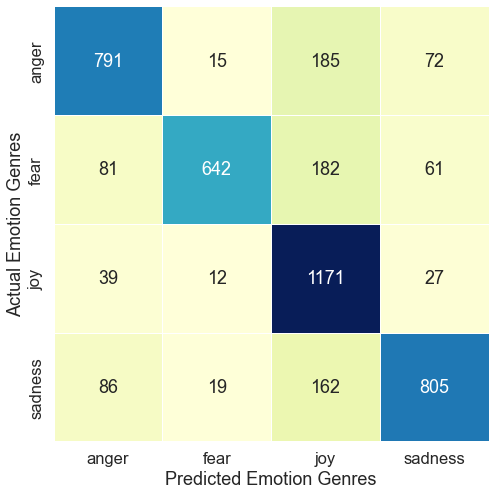

In [152]:
Confusion_Matrix_Multinomial_Naive_Baye('YlGnBu')

### Bernoulli Nave Bayes

In [153]:
Bernoulli_Nave_Bayes= BernoulliNB()
#fitting
Bernoulli_Nave_Bayes.fit(trained_tf_X, train_emotion_lbl)
#ypred
ypred_Bernoulli_Nave_Bayes = Bernoulli_Nave_Bayes.predict(testes_tf_X)

In [154]:
# Test Bernoulli Nave Bayes model using Test Data
print("first 20 actual Emotion Genres")
y_test[:20]  

first 20 actual Emotion Genres


38000    happy
38001    happy
38002    anger
38003      sad
38004    anger
38005     fear
38006    happy
38007      sad
38008    anger
38009    happy
38010      sad
38011    happy
38012    happy
38013      sad
38014    happy
38015    happy
38016    happy
38017    anger
38018    anger
38019     fear
Name: Emotion, dtype: object

In [155]:
print("First 20 predicted Emotion Genres by Bernoulli Naive Bayes")
print('--------------------------------------')

#Generate first 20 predicted emotion categories
for Emotion_Genres in ypred_Bernoulli_Nave_Bayes[:20]:
    print(Emotion_Genres)

First 20 predicted Emotion Genres by Bernoulli Naive Bayes
--------------------------------------
sad
happy
anger
sad
happy
anger
happy
sad
happy
happy
sad
happy
happy
sad
happy
anger
happy
sad
happy
anger


In [156]:
# Calculate the confusion matrix and identify the model performance
print(classification_report(y_test,ypred_Bernoulli_Nave_Bayes))
print(accuracy_score(y_test, ypred_Bernoulli_Nave_Bayes))

              precision    recall  f1-score   support

       anger       0.72      0.78      0.75      1063
        fear       0.86      0.72      0.78       966
       happy       0.78      0.85      0.81      1249
         sad       0.79      0.77      0.78      1072

    accuracy                           0.78      4350
   macro avg       0.79      0.78      0.78      4350
weighted avg       0.79      0.78      0.78      4350

0.784367816091954


In [157]:
# Function for evaluate of Multinomial Naive Baye model

print("F1 score of the Bernoulli Naive Bayes model")
print(f1_score(y_test,ypred_Bernoulli_Nave_Bayes,average='micro'))
print("\n")

#Set the accuracy
print ('Bernoulli Naive Bayes accuracy score')
print (accuracy_score(y_test,ypred_Bernoulli_Nave_Bayes))
print("\n")

#Calculate accuracy as percentage
print("Accuracy of the Bernoulli Naive Bayes model in percentage")
print(round(accuracy_score(y_test,ypred_Bernoulli_Nave_Bayes)*100,3),"%")

F1 score of the Bernoulli Naive Bayes model
0.784367816091954


Bernoulli Naive Bayes accuracy score
0.784367816091954


Accuracy of the Bernoulli Naive Bayes model in percentage
78.437 %


### Confusion Matrix - Bernoulli Nave Bayes

In [158]:
# Define a function called Confusion_Matrix_Bernoulli_Nave_Bayes

def Confusion_Matrix_Bernoulli_Nave_Bayes(color_code):
    
    #set expected value , predicted value and return the confution matrix
    Matrix=confusion_matrix(y_test, ypred_Bernoulli_Nave_Bayes)
    
    #Arrange data as a data frame
    Matrix=pd.DataFrame(Matrix, index=[i for i in range(1,5)], 
                        columns=[i for i in range(1,5)])
    
    #set the fon size
    sns.set(font_scale=1.5)
    
    #set the figure size
    plt.figure(figsize=(8,8));

    
    #set two-dimensional graphical representation according to colours
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(Matrix, cmap=color_code,linewidths=1, 
                annot=True,square=True, fmt='d', 
                cbar=False,
                xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'love', 'sadness']);
    #x axis
    plt.xlabel("Predicted Emotion Genres");
    
    #y axis
    plt.ylabel("Actual Emotion Genres");

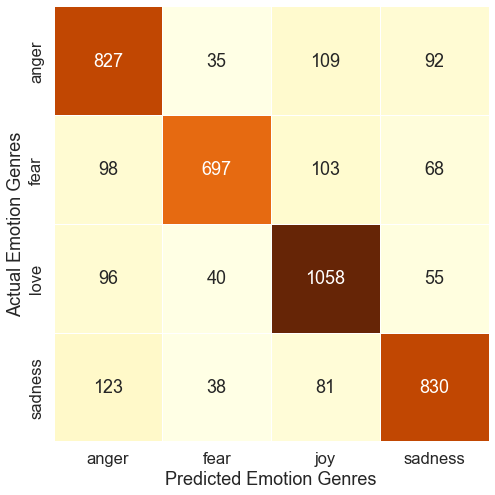

In [159]:
#Call the function
Confusion_Matrix_Bernoulli_Nave_Bayes('YlOrBr')

### Support Vector machine - Linear

In [160]:
#trian model uisng support vector machine
support_vector_machine = svm.SVC(kernel='linear',probability=True)

support_vector_machine.fit(trained_tf_X, train_emotion_lbl)
#ypred
ypred_support_vector_machine = support_vector_machine.predict(testes_tf_X)

In [161]:
# Test svm model using Test Data
# Display Actual Emotion Genres from Row 50 to 70
print("Actual Emotion Genres from Row 50 -70")
y_test[50:70]  

Actual Emotion Genres from Row 50 -70


38050     fear
38051      sad
38052    happy
38053      sad
38054    anger
38055    anger
38056    happy
38057    happy
38058    anger
38059    happy
38060    anger
38061    happy
38062     fear
38063     fear
38064    happy
38065      sad
38066    happy
38067    happy
38068      sad
38069      sad
Name: Emotion, dtype: object

In [162]:
# Display Actual Emotion Genres from Row 50 to 70
print("Actual Emotion Genres from Row 50 -70")
print('--------------------------------------')
for i in ypred_support_vector_machine[50:70]:
    print(i)

Actual Emotion Genres from Row 50 -70
--------------------------------------
fear
sad
happy
happy
anger
anger
happy
happy
anger
anger
anger
happy
fear
sad
happy
sad
happy
happy
sad
sad


In [163]:
# Calculate the confusion matrix and identify the model performance
print(classification_report(y_test,ypred_support_vector_machine))
print(accuracy_score(y_test, ypred_support_vector_machine))

              precision    recall  f1-score   support

       anger       0.81      0.88      0.84      1063
        fear       0.88      0.82      0.85       966
       happy       0.87      0.91      0.89      1249
         sad       0.89      0.82      0.85      1072

    accuracy                           0.86      4350
   macro avg       0.86      0.86      0.86      4350
weighted avg       0.86      0.86      0.86      4350

0.8597701149425288


In [164]:
# Function for evaluate of SVM model

print("F1 score of the Linear SVM model")
print(f1_score(y_test,ypred_support_vector_machine,average='micro'))
print("\n")


print ('Linear Svm accuracy score')
print (accuracy_score(y_test, ypred_support_vector_machine))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the Linear SVM model in percentage")
print(round(accuracy_score(y_test,ypred_support_vector_machine)*100,3),"%")

F1 score of the Linear SVM model
0.8597701149425288


Linear Svm accuracy score
0.8597701149425288


Accuracy of the Linear SVM model in percentage
85.977 %


### Confusion Matrix - Linear SVM

In [165]:
# Define a function called Confusion_Matrix_Linear_SVM
def Confusion_Matrix_Linear_SVM(color_code):
    
    # Create confusion matrix
    # Compute confusion matrix to evaluate the accuracy of a classification.
    Confusion_Matrix_SVM=confusion_matrix(y_test, ypred_support_vector_machine)
    
    # Arrange as a data frame
    Confusion_Matrix_SVM=pd.DataFrame(Confusion_Matrix_SVM, 
                                      index=[i for i in range(1,5)], 
                                      columns=[i for i in range(1,5)])
    
    # Set the font size
    sns.set(font_scale=1.5)
    
    # Set the figure size
    plt.figure(figsize=(8,8));
    
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(Confusion_Matrix_SVM, cmap=color_code,linewidths=1, 
                annot=True,square=True, fmt='d', 
                cbar=False,
                xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness']);
    
    # x-axis
    plt.xlabel("Predicted Emotion Genres");
    # y-axis
    plt.ylabel("Actual Emotion Genres");


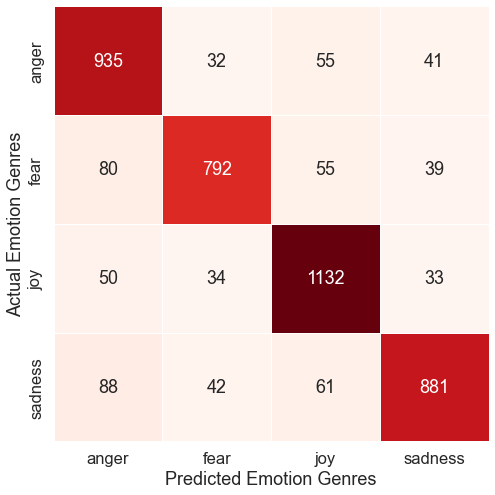

In [166]:
# Call to Confusion_Matrix_Linear_SVM Function
Confusion_Matrix_Linear_SVM('Reds')

### K Nearest Neighbor - Uniform

In [167]:
# Define knn parameters
Uniform_KNN = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')

#fitting
Uniform_KNN.fit(trained_tf_X, train_emotion_lbl)

#ypred
ypred_Uniform_KNN = Uniform_KNN.predict(testes_tf_X)

In [168]:
# Test Uniform KNN model using Test Data
print("Actual Emotion Genres from Row 1100 - 1120")
y_test[1100:1120] 

Actual Emotion Genres from Row 1100 - 1120


39100     fear
39101     fear
39102      sad
39103      sad
39104    happy
39105    happy
39106      sad
39107     fear
39108    anger
39109    anger
39110    anger
39111    anger
39112    anger
39113      sad
39114    happy
39115     fear
39116    happy
39117    happy
39118     fear
39119     fear
Name: Emotion, dtype: object

In [169]:
print("predicted Emotion Genre for Row 1100 - 1120")
print('--------------------------------------')

for Emotion_Genre in ypred_Uniform_KNN[1100:1120]:
    print(Emotion_Genre)
    

predicted Emotion Genre for Row 1100 - 1120
--------------------------------------
anger
happy
happy
anger
happy
happy
anger
anger
happy
anger
anger
anger
anger
sad
happy
fear
anger
happy
fear
anger


In [170]:
# Calculate the confusion matrix and identify the model performance
print(classification_report(y_test,ypred_Uniform_KNN))
print(accuracy_score(y_test, ypred_Uniform_KNN))

              precision    recall  f1-score   support

       anger       0.43      0.90      0.58      1063
        fear       0.95      0.37      0.53       966
       happy       0.69      0.69      0.69      1249
         sad       0.90      0.41      0.57      1072

    accuracy                           0.60      4350
   macro avg       0.74      0.59      0.59      4350
weighted avg       0.74      0.60      0.60      4350

0.6032183908045977


In [171]:
# Function for evaluate of Uniform KNN model

print("F1 score of the Uniform KNN model")
print(f1_score(y_test,ypred_Uniform_KNN,average='micro'))
print("\n")


print ('Uniform KNN accuracy score')
print (accuracy_score(y_test, ypred_Uniform_KNN))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the Uniform KNN model in percentage")
print(round(accuracy_score(y_test,ypred_Uniform_KNN)*100,3),"%")

F1 score of the Uniform KNN model
0.6032183908045977


Uniform KNN accuracy score
0.6032183908045977


Accuracy of the Uniform KNN model in percentage
60.322 %


### Confusion Matrix - Uniform KNN

In [172]:
#Define a function called Confusion_Matrix_Uniform_KNN

def Confusion_Matrix_Uniform_KNN(color_code):
    
    
    #Set the expected, predicted values as returns confusion matrix
    Matrix=confusion_matrix(y_test, ypred_Uniform_KNN)
    
    #Arrange Matrix as a data frame
    Matrix=pd.DataFrame(Matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    
    #set the font size
    sns.set(font_scale=1.5)
    
    #set the figure size
    plt.figure(figsize=(8,8));

    
    #set two-dimensional graphical representation according to colours
    sns.heatmap(Matrix, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['anger', 'fear', 'joy', 'sadness'],yticklabels=['anger', 'fear', 'joy', 'sadness']);
    plt.xlabel("Predicted Emotion Genres");
    plt.ylabel("Actual Emotion Genres");

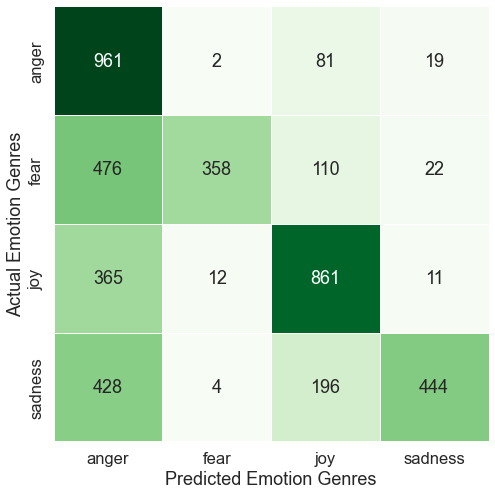

In [173]:
#call the function
Confusion_Matrix_Uniform_KNN('Greens')

### Distant KNN

In [175]:
print("Actual Emotion Genres from Row 1200 - 1220")
y_test[1200:1220]  

Actual Emotion Genres from Row 1200 - 1220


39200    happy
39201    anger
39202      sad
39203      sad
39204    anger
39205    anger
39206    anger
39207     fear
39208     fear
39209     fear
39210      sad
39211    anger
39212    happy
39213    happy
39214    anger
39215     fear
39216    anger
39217     fear
39218    happy
39219    anger
Name: Emotion, dtype: object

In [174]:
# distance:- weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
Distant_KNN = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

#fitting
Distant_KNN.fit(trained_tf_X, train_emotion_lbl)

#ypred
ypred_Distant_KNN1 = Distant_KNN.predict(testes_tf_X)

In [177]:
# Calculate the confusion matrix and identify the model performance
print(classification_report(y_test,ypred_Distant_KNN1))
print(accuracy_score(y_test, ypred_Distant_KNN1))

              precision    recall  f1-score   support

       anger       0.77      0.96      0.86      1063
        fear       1.00      0.89      0.94       966
       happy       0.92      0.88      0.90      1249
         sad       0.98      0.88      0.93      1072

    accuracy                           0.90      4350
   macro avg       0.92      0.90      0.91      4350
weighted avg       0.92      0.90      0.90      4350

0.9027586206896552


In [176]:
print("Actual Emotion Genres from Row 1200 - 1220")
print('--------------------------------------')
for i in ypred_Distant_KNN1[1200:1220]:
    print(i)
    

Actual Emotion Genres from Row 1200 - 1220
--------------------------------------
anger
anger
sad
sad
anger
anger
anger
fear
fear
fear
sad
anger
happy
happy
anger
fear
anger
fear
happy
anger


In [178]:
# Function for evaluate of Distant KNN model

print("F1 score of the Distant KNN model")
print(f1_score(y_test,ypred_Distant_KNN1,average='micro'))
print("\n")


print ('Distant KNN accuracy score')
print (accuracy_score(y_test, ypred_Distant_KNN1))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the Distant KNN model in percentage")
print(round(accuracy_score(y_test,ypred_Distant_KNN1)*100,3),"%")

F1 score of the Distant KNN model
0.9027586206896552


Distant KNN accuracy score
0.9027586206896552


Accuracy of the Distant KNN model in percentage
90.276 %


### Confusion Matrix - Distant KNN

In [179]:
#Define a function called confusion_mat5
def Confusion_Matrix_Distant_KNN(color_code):
    confusion_matrix_DKNN=confusion_matrix(y_test, ypred_Distant_KNN1)
    
    confusion_matrix_DKNN=pd.DataFrame(confusion_matrix_DKNN, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));
    
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(confusion_matrix_DKNN, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['anger', 'fear', 'joy', 'sadness'],yticklabels=['anger', 'fear', 'joy', 'sadness']);
    plt.xlabel("Predicted Emotion Genres");
    plt.ylabel("Actual Emotion Genres");

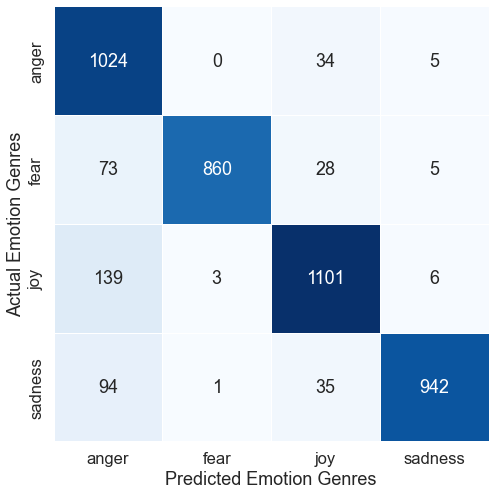

In [180]:
Confusion_Matrix_Distant_KNN('Blues')

# hyperparameter optimization KNN Distance

In [181]:
#create empty list call empty
error=[]

for i in range(1,100):
   
    knn_Distant = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    
    #fitting
    knn_Distant.fit(trained_tf_X, train_emotion_lbl)
    
    #ypred
    
    ypred_Distant_KNN = knn_Distant.predict(testes_tf_X)

    #Append mean value
    error.append(np.mean(ypred_Distant_KNN != test_emotion_lbl))

In [182]:
print(error)

[0.09034482758620689, 0.08919540229885058, 0.08827586206896551, 0.09655172413793103, 0.09724137931034482, 0.09724137931034482, 0.09977011494252873, 0.10091954022988506, 0.10252873563218391, 0.10620689655172413, 0.10344827586206896, 0.10942528735632184, 0.11172413793103449, 0.11241379310344828, 0.11632183908045977, 0.11218390804597701, 0.0967816091954023, 0.09011494252873563, 0.08459770114942529, 0.07655172413793103, 0.07103448275862069, 0.06942528735632184, 0.06436781609195402, 0.06091954022988506, 0.06022988505747127, 0.05954022988505747, 0.05931034482758621, 0.05839080459770115, 0.058850574712643676, 0.05839080459770115, 0.058850574712643676, 0.05954022988505747, 0.05839080459770115, 0.05862068965517241, 0.05724137931034483, 0.05816091954022989, 0.057701149425287354, 0.057011494252873565, 0.05379310344827586, 0.05471264367816092, 0.05471264367816092, 0.05563218390804598, 0.05540229885057471, 0.05540229885057471, 0.054942528735632185, 0.05540229885057471, 0.05310344827586207, 0.053333

Text(0, 0.5, 'Mean Error')

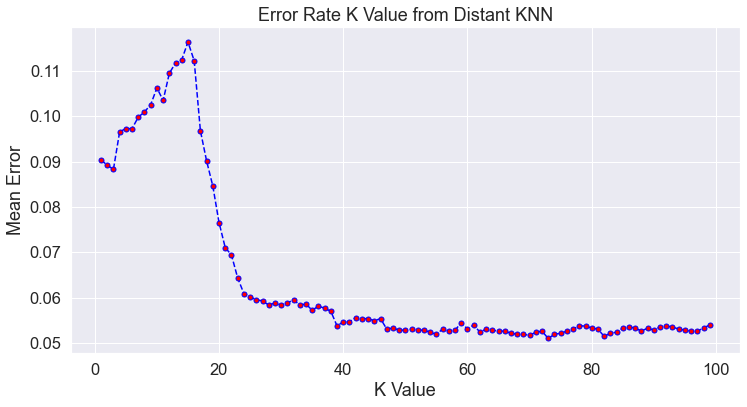

In [183]:
# Setting the width and height of the figure in inches
plt.figure(figsize=(12,6))
# Plot a Line graph of the error rate
plt.plot(range(1,100),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
# Title of graph
plt.title('Error Rate K Value from Distant KNN')
# X axis
plt.xlabel('K Value')
# Y axis
plt.ylabel('Mean Error')

In [343]:
# Classifier implementing the k-nearest neighbors vote
# n_neighbors:- Number of neighbors to use by default for kneighbors queries.
Distant_KNN_Best = KNeighborsClassifier(n_neighbors=56, weights = 'distance')
#fitting
Distant_KNN_Best.fit(trained_tf_X, train_emotion_lbl)
#ypred
ypred_knn_Distant_best  = Distant_KNN_Best.predict(testes_tf_X)

In [344]:
print(classification_report(test_emotion_lbl,ypred_knn_Distant_best))
print(accuracy_score(y_test, ypred_knn_Distant_best))

              precision    recall  f1-score   support

       anger       0.95      0.95      0.95      1063
        fear       1.00      0.91      0.95       966
       happy       0.90      0.98      0.94      1249
         sad       0.96      0.94      0.95      1072

    accuracy                           0.95      4350
   macro avg       0.95      0.94      0.95      4350
weighted avg       0.95      0.95      0.95      4350

0.9471264367816092


In [345]:
# Function for evaluate of Distant KNN model

print("F1 score of the Distant KNN model")
print(f1_score(y_test,ypred_knn_Distant_best,average='micro'))
print("\n")


print ('Distant KNN accuracy score')
print (accuracy_score(y_test, ypred_knn_Distant_best))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the Distant KNN model in percentage")
print(round(accuracy_score(y_test,ypred_knn_Distant_best)*100,3),"%")

F1 score of the Distant KNN model
0.9471264367816092


Distant KNN accuracy score
0.9471264367816092


Accuracy of the Distant KNN model in percentage
94.713 %


In [346]:
#Define a function called confusion_mat5
def Confusion_Matrix_Distant_KNN(color_code):
    confusion_matrix_DKNN=confusion_matrix(y_test, ypred_knn_Distant_best)
    
    confusion_matrix_DKNN=pd.DataFrame(confusion_matrix_DKNN, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));
    
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(confusion_matrix_DKNN, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['anger', 'fear', 'joy', 'sadness'],yticklabels=['anger', 'fear', 'joy', 'sadness']);
    plt.xlabel("Predicted Emotion ");
    plt.ylabel("Actual Emotion ");

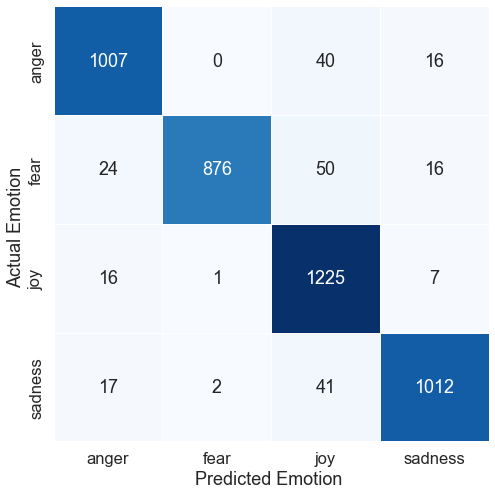

In [347]:
Confusion_Matrix_Distant_KNN('Blues')

### Compare Accuracies

In [189]:
#Accuracy classification score
Nb1=round(accuracy_score(y_test,ypred_Multinomial_Naive_Bayes)*100,3)
Nb2 = round(accuracy_score(test_emotion_lbl,ypred_Bernoulli_Nave_Bayes)*100,3)
svm1 = round(accuracy_score(test_emotion_lbl,ypred_support_vector_machine)*100,3)
knn1 = round(accuracy_score(test_emotion_lbl,ypred_Uniform_KNN)*100,3)
knn2= round(accuracy_score(test_emotion_lbl,ypred_Distant_KNN1)*100,3)
knn3= round(accuracy_score(test_emotion_lbl,ypred_knn_Distant_best)*100,3)

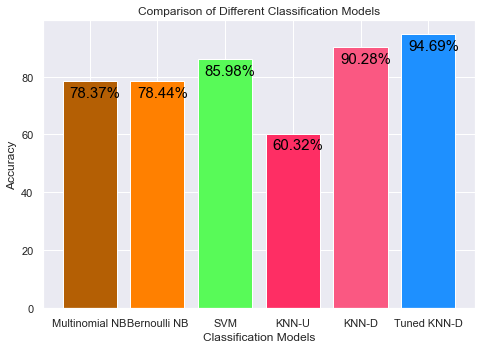

In [192]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Multinomial NB', 'Bernoulli NB', 'SVM', 'KNN-U','KNN-D','Tuned KNN-D']
Accuracy=[Nb1,Nb2,svm1,knn1,knn2,knn3]
#Define colours to bars
ax.bar(Models,Accuracy,color=['#B45F04','#FF8000','#58FA58','#FE2E64','#FA5882','#1e90ff' ]);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='black')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');
plt.show();

In [348]:
import pickle

pickle.dump(Distant_KNN_Best, open("emo_KNN_Distant_model.pickle", 'wb'))
pickle.dump(new_vectorizer, open("emo_knn_vectorizer.pickle", "wb"))

vectorizer = pickle.load(open("emo_knn_vectorizer.pickle",'rb'))
model = pickle.load(open("emo_KNN_Distant_model.pickle",'rb'))
pred = model.predict(vectorizer.transform(["i have got a new phone. its from Apple.. and i love it!"]))[0]
print ("predicted class:", pred)

predicted class: happy


## Emotion detector build by this analayes

In [370]:
nltk.download('stopwords')

set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [380]:
def predict_Emotion_Genre(s):
    
    stop_words = stopwords.words('english')
    
    s = s.lower()
    
    # Remove all the special characters
    TextWordsArray = re.sub(r'\W', ' ', str(s))

    # remove all single characters
    TextWordsArray= re.sub(r'\s+[a-zA-Z]\s+', ' ', TextWordsArray)

    # Remove single characters from the start
    TextWordsArray = re.sub(r'\^[a-zA-Z]\s+', ' ', TextWordsArray) 

    # Substituting multiple spaces with single space
    TextWordsArray = re.sub(r'\s+', ' ', TextWordsArray, flags=re.I)
    
    text_final = ''.join(c for c in TextWordsArray if not c.isdigit())
    
    processed_doc1 = ' '.join([word for word in text_final.split() if word not in stop_words])
    
    X_test_tf = vectorizer.transform([processed_doc1])
    
    predict_result = model.predict(X_test_tf)
    Pred_proba =  model.predict_proba(X_test_tf)
    Pred_all = model.classes_,Pred_proba
    
    x = Pred_all
    emotion_list = x[0].tolist()
    Predict_prob = x[1].tolist()
    Predict_prob = Predict_prob[0]
    
    multiplied_list = [round(element * 100,2) for element in Predict_prob]
    
    
    score_values = {'emotion':emotion_list ,
                   'predicted_probability':multiplied_list}

    score_df = pd.DataFrame(score_values)
    
    score = np.max(Pred_proba)
     
    final_result = "You have commented it in a "+predict_result[0] +" mood.You can  proceed or update the content."
    
    print("predicted Result :"+predict_result[0])
    
    print("predicted Score  :"+str(round(score*100,2)))
    print()
    print('-----------------------------------')
    print(final_result)
    print('-----------------------------------')
    return score_df

In [381]:
predict_Emotion_Genre('These buses are not very crowded and therefore are safe to travel in as they prevent diseases from spreading ')

predicted Result :happy
predicted Score  :61.37

-----------------------------------
You have commented it in a happy mood.You can  proceed or update the content.
-----------------------------------


,emotion,predicted_probability
0,anger,17.42
1,fear,10.82
2,happy,61.37
3,sad,10.38


In [382]:
predict_Emotion_Genre('This bus is always crowded')

predicted Result :anger
predicted Score  :50.0

-----------------------------------
You have commented it in a anger mood.You can  proceed or update the content.
-----------------------------------


,emotion,predicted_probability
0,anger,50.00
1,fear,0.00
2,happy,35.71
3,sad,14.29


In [383]:
predict_Emotion_Genre('The passenger lives are in danger during rush hour traffic as passengers have to travel even in the foot board ')

predicted Result :anger
predicted Score  :49.97

-----------------------------------
You have commented it in a anger mood.You can  proceed or update the content.
-----------------------------------


,emotion,predicted_probability
0,anger,49.97
1,fear,27.14
2,happy,14.09
3,sad,8.80
